## 1. Importing Necessary Modules 

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report



##  2.  loading dataset

In [2]:



from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()

## 3. Exploring the dataset

In [3]:
# EDA will help us understand the dataset structure


df = pd.DataFrame(data.data , columns= data.feature_names)
df.sample(12)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.070380,0.2057,0.09575,...,10.60,18.04,69.47,328.1,0.20060,0.36630,0.29130,0.10750,0.2848,0.13640
444,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,0.1720,0.05780,...,20.38,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225
398,11.060,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,12.68,20.35,80.79,496.7,0.11200,0.18790,0.20790,0.05556,0.2590,0.09158
66,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.015040,0.1717,0.06899,...,10.41,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
396,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.053810,0.1806,0.06079,...,14.80,27.20,97.33,675.2,0.14280,0.25700,0.34380,0.14530,0.2666,0.07686
393,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.156200,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007
191,12.770,21.41,82.02,507.4,0.08749,0.06601,0.03112,0.028640,0.1694,0.06287,...,13.75,23.50,89.04,579.5,0.09388,0.08978,0.05186,0.04773,0.2179,0.06871
459,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.010430,0.1621,0.05952,...,10.67,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
32,17.020,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.120300,0.2248,0.06382,...,20.88,32.09,136.10,1344.0,0.16340,0.35590,0.55880,0.18470,0.3530,0.08482


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# also analyzing our target variable

"""
Two classification labels:
0 (Malignant) : Cancerous
1 (Benign) : Non-cancerous
"""
df2 = pd.DataFrame(data.target , columns=['target'])
df2.sample(12)


,target
403,1
370,0
265,0
36,0
14,0
15,0
526,1
175,1
556,1
69,1


([<matplotlib.patches.Wedge at 0x131b335e0>,
 [Text(-0.4286546999573329, 1.0130425204326268, '1'),
  Text(0.428654605109445, -1.013042560566172, '0')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.7%'),
  Text(0.23381160278696997, -0.55256866939973, '37.3%')])

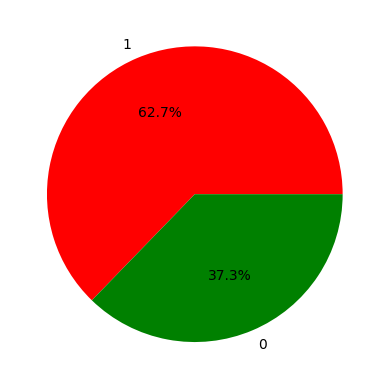

In [7]:
# Plotting an pie chart will help us understand the distribution of the target values.

class_counts = df2["target"].value_counts()
plt.pie(class_counts, labels= class_counts.index , autopct='%1.1f%%', colors=['red','green'])

## 4. Splitting the Data into Training and Testing Sets


In [8]:

X_train , X_test , y_train , y_test = train_test_split(data.data, data.target, test_size=0.30 , random_state = 42)

## 5. Building and Training the Model


In [9]:

model = GaussianNB()

model.fit(X_train , y_train)

GaussianNB()

## 6. Making Predictions


In [10]:
"""
Now as  our model  is trained  now its time to predict the classification of cancer cells in the test set.

The output is an array of 0s and 1s representing predicted tumor classifications.

"""

y_pred = model.predict(X_test)
print(y_pred[:10])


y_pred = model.predict(X_test)
print(y_pred[:12])


[1 0 0 1 1 0 0 0 1 1]
[1 0 0 1 1 0 0 0 1 1 1 0]


## 7. Evaluating Model Accuracy


In [11]:

report = classification_report(y_test , y_pred , target_names = ['Malignant', 'Benign'])
print(report)


              precision    recall  f1-score   support

   Malignant       0.93      0.90      0.92        63
      Benign       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [12]:
import pickle


# Save the trained model using pickle
with open("cancer_model.pkl", "wb") as f:
    pickle.dump(model, f)  # Save model to a .pkl file
